In [41]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
from PIL import Image


def show(im):
    plt.axis('off')
    plt.imshow(im)


def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])


def extrapolate_black(path_img, pix):
    sample_image = cv2.imread(path_img)
    img_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    # первое фото
    thresh = threshold_otsu(img_gray)
    img_otsu  = img_gray < thresh
    filtered = filter_image(img_rgb, img_otsu)
    cv2.imwrite(f'D:\AllProjects\VSPythonProjects\Archeological\images\_black_fon\{path_img[:-4]}_black_fon.jpg', filtered)

    # второе фото
    img_neg = cv2.bitwise_not(img_rgb)
    img_gray2=cv2.cvtColor(img_neg,cv2.COLOR_RGB2GRAY)
    thresh2 = threshold_otsu(img_gray2)
    img_otsu2  = img_gray2 < thresh2
    filtered2 = filter_image(img_rgb, img_otsu2)
    dilated = cv2.erode(filtered2.copy(), None, iterations=pix)
    img_neg2 = cv2.bitwise_not(dilated)
    cv2.imwrite(f'D:\AllProjects\VSPythonProjects\Archeological\images\_neg\{path_img[:-4]}_neg.jpg', img_neg2)

    # соединение
    im_rgba = Image.open(f'D:\AllProjects\VSPythonProjects\Archeological\images\_black_fon\{path_img[:-4]}_black_fon.jpg')
    im_rgba = Image.fromarray(np.array(im_rgba)[:,:,::-1])
    im_a = Image.open(f'D:\AllProjects\VSPythonProjects\Archeological\images\_neg\{path_img[:-4]}_neg.jpg').convert('L').resize(im_rgba.size)
    im_rgba.putalpha(im_a)
    im_rgba.save(f'D:\AllProjects\VSPythonProjects\Archeological\images\_extrapolated\{path_img[:-4]}_ext.png') 

    show(im_rgba)

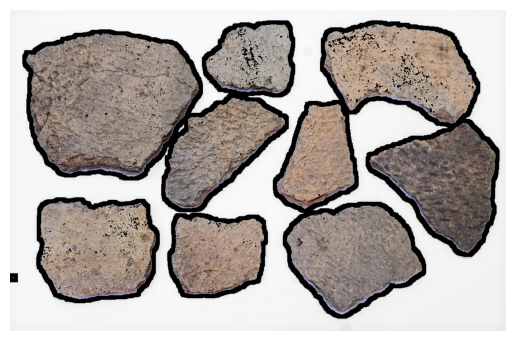

In [42]:
extrapolate_black("_original/stones.jpg", 8)

In [43]:
def change_one_color(path_img):
    im = Image.open(f'D:\AllProjects\VSPythonProjects\Archeological\images\_extrapolated\{path_img}')
    pixels = im.load()
    x, y = im.size
    for i in range(x):
        for j in range(y):
            if pixels[i, j] == (255, 255, 255, 255): 
                pixels[i, j] = (0, 0, 0, 255)
    im.save("tmp.png")
    show(im)
    #return im
    print(pixels[0,0])

(0, 0, 0, 15)


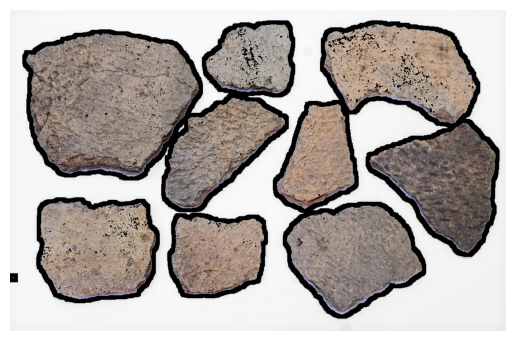

In [44]:
change_one_color('stones_ext.png')